Epoch 0: Cost 0.1705
Accuracy: 49.71%
Epoch 100: Cost 0.0849
Accuracy: 74.27%
Epoch 200: Cost 0.0747
Accuracy: 79.53%
Epoch 300: Cost 0.0678
Accuracy: 81.29%
Epoch 400: Cost 0.0623
Accuracy: 83.04%
Epoch 500: Cost 0.0579
Accuracy: 84.80%
Epoch 600: Cost 0.0541
Accuracy: 85.96%
Epoch 700: Cost 0.0508
Accuracy: 87.13%
Epoch 800: Cost 0.0479
Accuracy: 88.30%
Epoch 900: Cost 0.0454
Accuracy: 88.89%


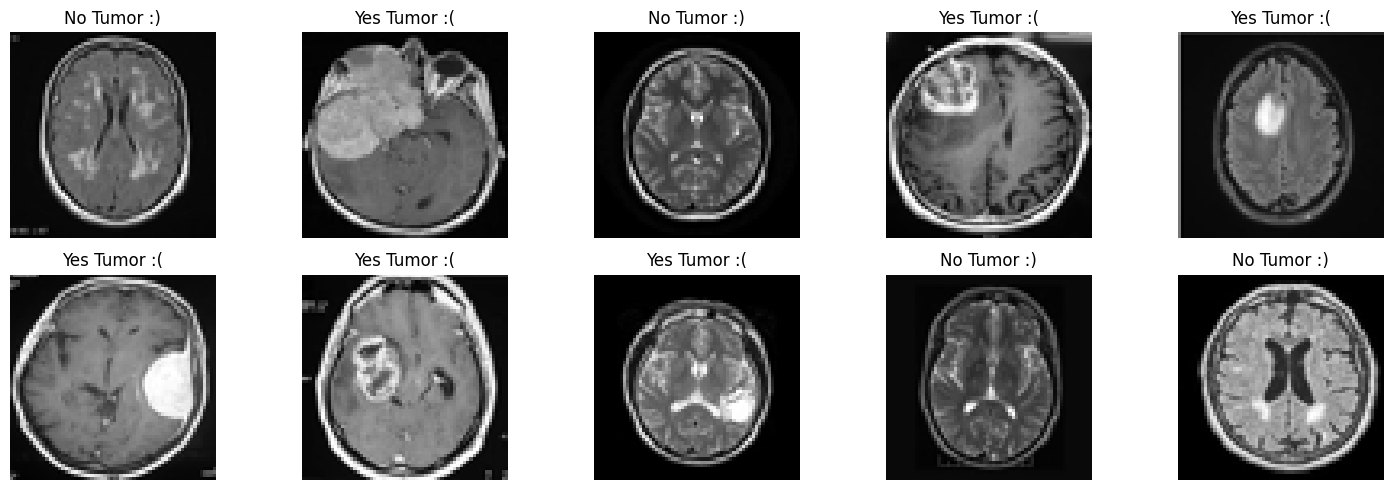

In [50]:
import numpy as np
import os 
from PIL import Image 
import matplotlib.pyplot as plt
import random 

def load_images(fp, targetSize=(64, 64)): #converting the jpg into a 1D array the computer can read
    """
    Walk through fp_base/yes and fp_base/no, load each JPG in grayscale,
    resize to target_size, flatten to 1D and normalize to [0,1]
    """
    x_list = []
    y_list = []
    
    for filename in os.listdir(fp):
        if not filename.endswith(".jpg"):
            continue
            
        if filename.startswith("Y"):
            label = 1
        elif "no" in filename:
            label = 0

        imgPath = os.path.join(fp, filename)
        img = Image.open(imgPath).convert("L").resize(targetSize)
        imgArr = np.asarray(img, dtype=np.float32).flatten() / 255.0

        x_list.append(imgArr)
        y_list.append(label)
    
    x = np.stack(x_list, axis=0)
    y = np.array(y_list, dtype=np.float32).reshape(-1, 1)
    return x, y

def initialize_features(nFeat):
    w = np.random.randn(nFeat, 1) * 0.01 #* 0.01 to features so that every feature doesnt have the s ame value 
    b = 0.0
    return w, b 

def predict(x, w, b):
    return x @ w + b #applying matrix multiplication on x and w then adding bias

def compute_cost(x, y, w, b):
    m = x.shape[0] #number of training examples 
    prediction = predict(x, w, b) #get predictions 
    cost = (1 / (2 * m)) * np.sum((prediction - y) ** 2) #Mean Squared Error Equation 
    return cost

def gradient_descent(x, y, w, b, learningRate=0.001, epochs=1000):
    """
    Performs gradient descent over a specified number of epochs
    Returns updated (w, b) and a history of cost values and accuracy of current data at each log step 
    """
    m = x.shape[0]
    cost_history = []

    for i in range(epochs):
        prediction = predict(x, w, b)
        prediction_num = (prediction >= 0.5).astype(np.float32)
        error = prediction - y
        
        dw = (1 / m) * x.T @ error 
        db = (1 / m) * np.sum(error) 

        w -= learningRate * dw 
        b -= learningRate * db

        if i % 100 == 0:
            cost = compute_cost(x, y, w, b)
            cost_history.append(cost)
            print(f"Epoch {i}: Cost {cost:.4f}")
            accuracy = np.mean(prediction_num == y) * 100
            print(f"Accuracy: {accuracy:.2f}%")
    show_images(x, y)    
    return w, b, cost_history

def show_images(x, y, numImages=10, imageSize=(64, 64)):
    randIndex = random.sample(range(x.shape[0]), numImages)
    plt.figure(figsize=(15,5)) 

    for i, index in enumerate(randIndex):
        imgArr =x[index].reshape(imageSize)
        label = "Yes Tumor :(" if y[index] == 1 else "No Tumor :)"
        plt.subplot(2,5,i+1)
        plt.imshow(imgArr, cmap='gray')
        plt.title(label)
        plt.axis('off')
    plt.tight_layout()
    plt.show()


fp = r"C:\Users\bjon6\Downloads\brain_tumor_dataset"
x, y = load_images(fp)
w, b = initialize_features(x.shape[1])
w, b, history = gradient_descent(x, y, w, b, learningRate=0.001, epochs=1000)

